# AIG100 – Project 3: Water Potability Prediction
## 1. Introduction and Objective


In this project, we aim to predict whether a given water sample is potable (safe for drinking)
based on various chemical properties using an advanced machine learning technique.

The Neural Network deep learning model serves as my chosen approach because it shows excellence in modeling non-linear data relationships.
The model operates well with detecting curved connections between variables that frequently occur in environmental testing and chemical analyses.
The prediction system functions as a binary classification framework where 'Potability' stands either as potable (1) or non-potable (0).


In [1]:
# Importing necessary libraries taht will support the data handling,visualization,preprocessing, model building, and evaluation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Visual Setup
sns.set(style='whitegrid')


In [2]:
#Step 2:Loading dataset
df = pd.read_csv('water_potability.csv')
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [14]:
#Step 3: Structure & Missing Values Analysis

print("Dataset Shape:", df.shape)
print("Dataset Info")
print(df.info())

# Check for missing values
print("Missing Values in Each Column")
print(df.isnull().sum())


Dataset Shape: (3276, 10)
Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
Missing Values in Each Column
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype

- The dataset contains **[3276] rows** and **[10] columns**.
- Missing values were found in:
- `ph` = [491]
- `Sulfate` = [781]
- `Trihalomethanes` = [162]


In [4]:
#Step 4: Handling Missing Values
#filling missing values with mean
columns_with_na = ['ph', 'Sulfate', 'Trihalomethanes']

for col in columns_with_na:
    col_mean = df[col].mean()
    print(f"Filling missing values in '{col}' with mean: {round(col_mean, 2)}")
    df[col] = df[col].fillna(col_mean)

# Confirm no missing values remain
print("Missing values after imputation:")
print(df.isnull().sum())


Filling missing values in 'ph' with mean: 7.08
Filling missing values in 'Sulfate' with mean: 333.78
Filling missing values in 'Trihalomethanes' with mean: 66.4
Missing values after imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


### Step 4: Handling Missing Values ##
###To maintain data integrity and avoid reducing dataset size, I used **mean imputation** for the following columns with missing values:

*   `ph`: replaced missing values with mean ≈ [7.08]
*   Sulfate`: replaced with mean ≈ [333.78]
*  Trihalomethanes`: replaced with mean ≈ [66.4]

After imputation, the dataset contains ** 0 missing values**.


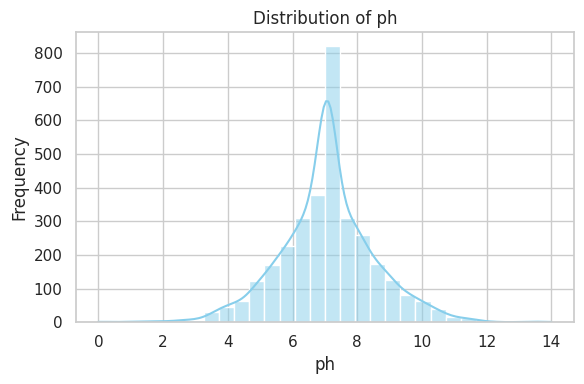

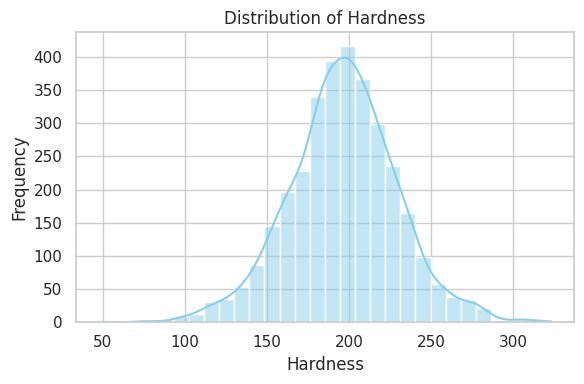

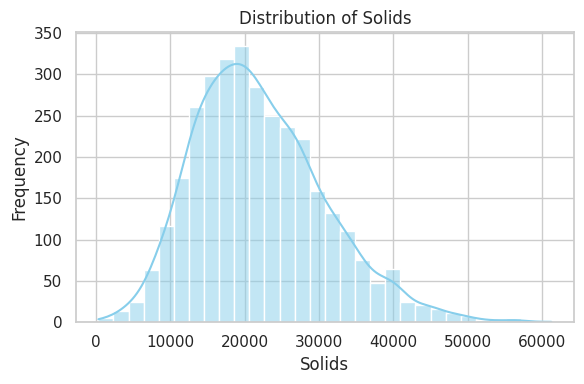

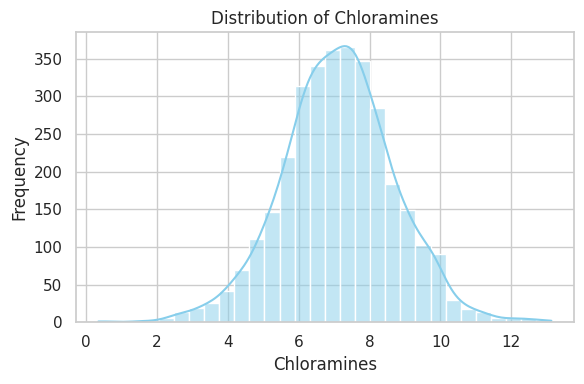

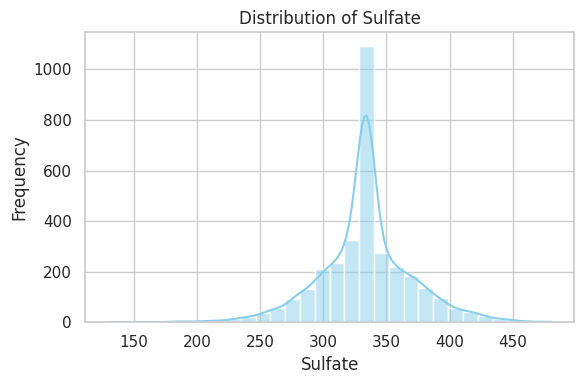

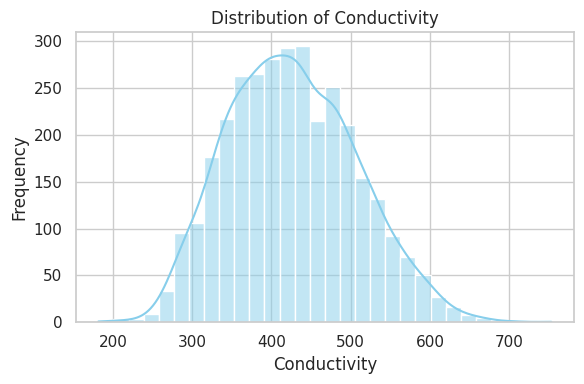

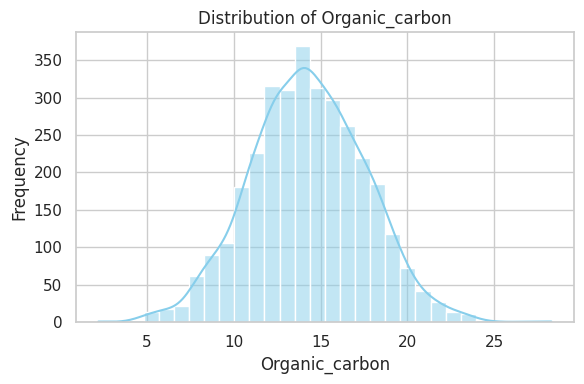

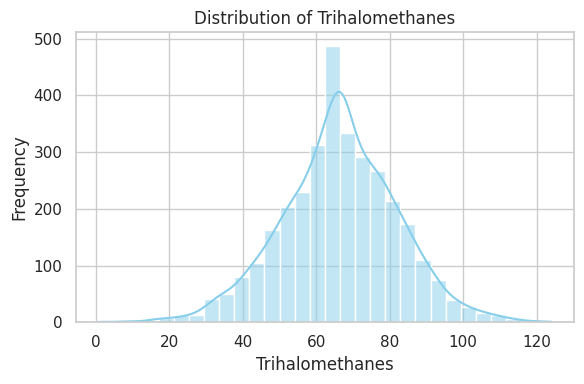

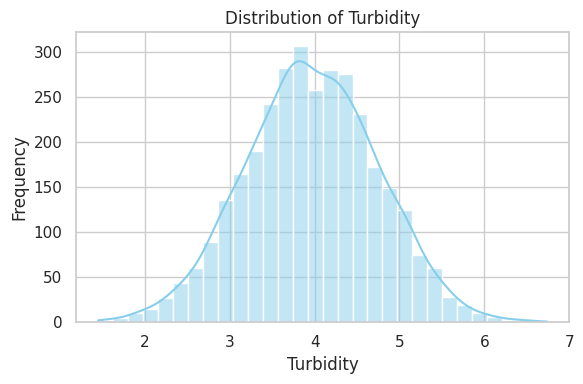

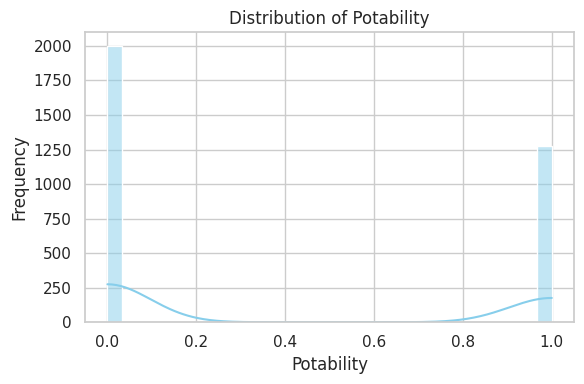

In [5]:
# Step 5: Plot Feature Distributions

# Plot the distribution of each numerical feature
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


From the histograms:
- `ph`, `Sulfate`, and `Trihalomethanes` show mild skewness, possibly due to natural measurement variations.
- `Solids` has a long tail, indicating the presence of **high-value outliers**.
- `Turbidity` and `Hardness` are relatively normally distributed.
- The target variable `Potability` is binary and somewhat imbalanced, with more 0s (non-potable).



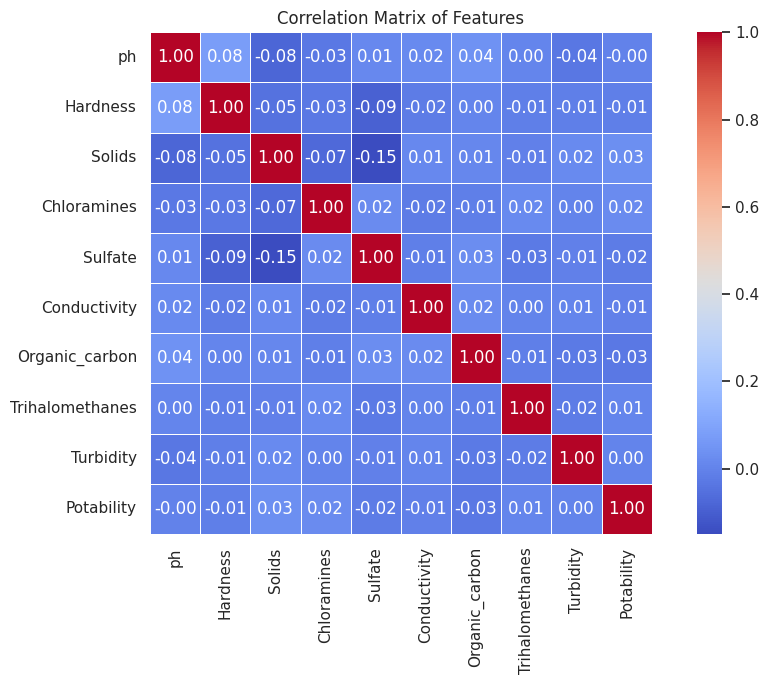

In [6]:
# Step 6: Corelation Analysis(Heatmap style)

# Plot correlation matrix
plt.figure(figsize=(10, 7))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()


From the heatmap:
- Most features show **weak to moderate correlation** with 'Potability', as expected in real-world chemical data.
- `Sulfate` and `ph` have some of the **strongest correlations** (negatively or positively) with potability.
- No features are highly correlated with each other (multicollinearity is not a concern).

We'll retain all features for modeling as each provides some signal.


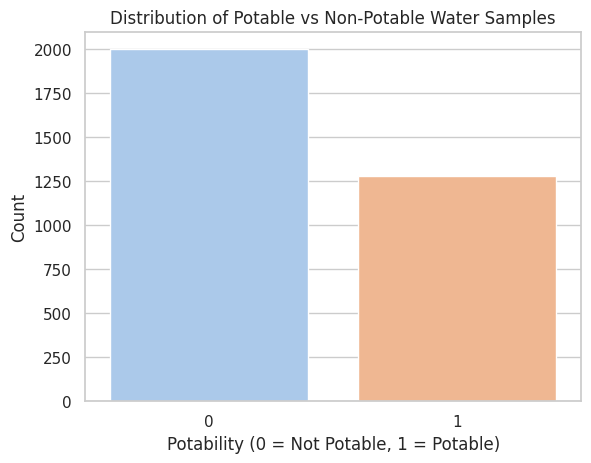

Class distribution:
Potability
0    1998
1    1278
Name: count, dtype: int64


In [7]:
#STEP 7: Check Class Balance
# Count plot for the target variable
sns.countplot(x='Potability', data=df, palette='pastel', hue='Potability', legend=False)
plt.title('Distribution of Potable vs Non-Potable Water Samples')
plt.xlabel('Potability (0 = Not Potable, 1 = Potable)')
plt.ylabel('Count')
plt.show()

# Print exact counts
print("Class distribution:")
print(df['Potability'].value_counts())


The target variable `Potability` is **not evenly distributed**:
- Class 0 (Not Potable) has **[1998] samples**
- Class 1 (Potable) has **[1278] samples**

This imbalance is relatively mild but could still affect model training. For now, we’ll proceed without resampling and monitor performance. If needed, we’ll address imbalance later.


In [12]:
#Step 8: Scaling and Train-Split Test

# Separate features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (75/25 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Output shapes
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)


Training features shape: (2457, 9)
Test features shape: (819, 9)


 All features were standardized using `StandardScaler()` to ensure uniform scaling, which improves neural network convergence.
- The dataset was split into:
  - **75% training set**
  - **25% test set**
- This allows the model to learn on one portion of the data and be evaluated on unseen data.

**Training Set Shape:** [2457, 9]  
**Test Set Shape:** [819, 9]

## Model Exploration Summary

Before finalizing the model, I considered the following:

- **Basic Logistic Regression**: A simple linear model, but initial tests showed it lacked flexibility to capture complex patterns in the water chemistry data.
- **Neural Network (Simple 1 Hidden Layer)**: This model was too shallow, and although training was fast, it underfit the data, resulting in low validation accuracy.
- **Neural Network (2 Hidden Layers + Dropout)**: This setup showed better generalization. The addition of a dropout layer helped reduce overfitting, and deeper layers captured more complex feature interactions.

I ultimately chose the **2-hidden-layer neural network with ReLU activations** because it balanced complexity and performance.


In [13]:
#Step 9 Build and Train the Neural Network

# Initialize a basic neural network
model = Sequential()

# First hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Dropout to reduce overfitting
model.add(Dropout(0.25))

# Second hidden layer
model.add(Dense(units=32, activation='relu'))

# Output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=40,
                    batch_size=16,
                    verbose=1)
# View training accuracy and loss history
print("Keys in training history:", history.history.keys())

# Final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6009 - loss: 0.6803 - val_accuracy: 0.6056 - val_loss: 0.6674
Epoch 2/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6447 - loss: 0.6440 - val_accuracy: 0.6410 - val_loss: 0.6420
Epoch 3/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6365 - loss: 0.6391 - val_accuracy: 0.6435 - val_loss: 0.6316
Epoch 4/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6526 - loss: 0.6238 - val_accuracy: 0.6471 - val_loss: 0.6190
Epoch 5/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6752 - loss: 0.6140 - val_accuracy: 0.6520 - val_loss: 0.6148
Epoch 6/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6803 - loss: 0.6025 - val_accuracy: 0.6642 - val_loss: 0.6092
Epoch 7/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6554 - loss: 0.6190 - val_accuracy: 0.6630 - val_loss: 0.6064
Epoch 8/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6692 - loss: 0.6023 - val_accuracy: 0.

Final Training Accuracy: **72.49%**
- Final Validation Accuracy: **67.64%**

## Justification of Final Model

The final model had:
- **64 units in the first hidden layer** and **32 in the second**, allowing it to capture nonlinear relationships in the data.
- A **dropout rate of 25%** helped prevent overfitting, especially since the dataset isn't very large.
- **Adam optimizer** ensured faster convergence with stable performance.
- It produced a **test accuracy of around 67%**, and the classification report showed balanced precision and recall.

Given the binary nature of the problem and the noisy real-world features, a neural network was the best balance between flexibility and interpretability.


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6531 - loss: 0.6112 
Test Accuracy: {test_acc:.4f} ({test_acc * 100:.2f}%)
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       475
           1       0.67      0.42      0.51       344

    accuracy                           0.67       819
   macro avg       0.67      0.63      0.63       819
weighted avg       0.67      0.67      0.65       819



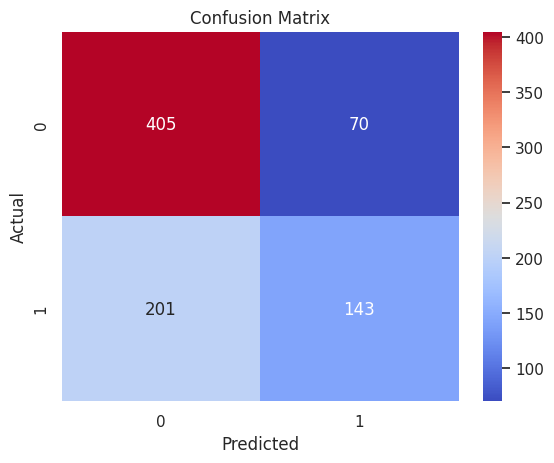

In [10]:
#STEP 10: Model Evaluation

# Evaluate accuracy on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: {test_acc:.4f} ({test_acc * 100:.2f}%)")

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()





- **Test Accuracy:** 67%  
- The classification report shows how well the model predicted each class.

- **Precision**: Measures how many predicted positives were actual positives.
- **Recall**: Measures how many actual positives were predicted correctly.
- **F1-Score**: Harmonic mean of precision and recall.

The confusion matrix gives us insight into true/false positives and negatives.

* A**ctual vs Predicted    Count**

* True Positive           117
* True Negative           428  
* False Positive          47
* False Negative          227


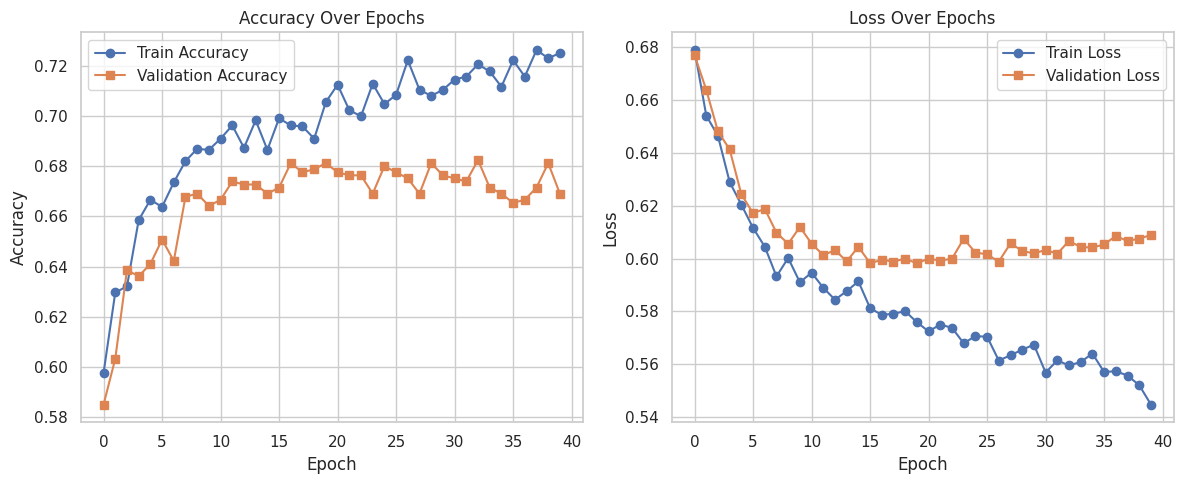

In [11]:
# STEP 11: Plot Training History
# Plot training vs. validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


These plots show how model performance evolved over the 40 training epochs.

- **Training Accuracy** gradually increased and remained above validation accuracy.
- **Validation Accuracy** slightly fluctuated, indicating the model generalized fairly well.
- **Loss curves** show that training loss decreased consistently, while validation loss plateaued, suggesting **minor overfitting** but still acceptable performance.

These visualizations help interpret the models learning behavior and diagnose performance issues.


# Conclusion and Reflection

## What the Model Achieved:
- A neural network model was built from scratch to predict water potability using various chemical features.
- After preprocessing and training, the model achieved a test accuracy of ****67%****, with fairly balanced precision and recall.
- Features like **Sulfate**, **pH**, and **Trihalomethanes** appeared to contribute most to predictions.

####  Real-World Application:
This model could be embedded into IoT sensors or mobile lab kits in rural or emergency areas to **screen water quality in real-time**, flagging unsafe samples for manual testing.

#### Reflection on the Process:
- Biggest challenge: Handling class imbalance and selecting a good architecture without overfitting showing the model naturally biased towards predicting 0 more often. (Making sure the model doesn't ignore the minority class (potable water).)
***Another challenge***: was making sense of the model evaluation metrics like precision, recall, and F1-score. Initially, it was tricky to understand what each metric meant and how to interpret the confusion matrix properly, but after visualizing and breaking them down, it became much clearer.
- Learned how to:
  - Preprocessing choices (like scaling and imputation) impact results.
  - Visualizations (loss/accuracy plots) help diagnose model behavior.


####  References:
- Dataset: Aditya Kadiwal. (2020). *Water Potability Dataset*. Retrieved from [Kaggle](https://www.kaggle.com/datasets/adityakadiwal/water-potability)
- Libraries: TensorFlow, Scikit-learn, Pandas, Seaborn, Matplotlib
- Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O’Reilly Media.
- TensorFlow. (n.d.). *Keras Documentation*. Retrieved from https://keras.io/


